In [10]:
#hide
options(jupyter.plot_scale=3)
options(jupyter.display_mimetypes=c("text/html"))
# options(jupyter.rich_display=FALSE)
options(repr.plot.width=6,repr.plot.height=6,repr.plot.res=300)
options(max.print=1000)

# "R입문 기말고사 대비문제"
> "전북대학교 R입문 기말고사 대비문제"

- toc: true
- branch: master
- badges: true
- comments: true
- author: Kim Jeewoo
- categories: [Introduction to R, Exam]
- image: images/r_logo.jpg

In [7]:
library(tidyverse)

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.5     v dplyr   1.0.7
v tidyr   1.1.4     v stringr 1.4.0
v readr   2.0.2     v forcats 0.5.1

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



## `1`. 회귀분석 

아래와 같은 수식을 고려하자. 

$$y_i= 1.5+ 5\sin(t_i)+ 3 \cos(4 t_i)+\epsilon_i, \quad i=1,2,\dots, 1000$$

여기에서 $t_i=\frac{2\pi i}{1000}$ 이다. 그리고 $\epsilon_i \sim i.i.d~ N(0,1)$, 즉 서로 독립인 표준정규분포에서 추출된 샘플이다. 

#### `(1)` `rnorm()`을 이용하여 $\{\epsilon_i \}_{i=1}^{1000}$ 을 만들고 이를 벡터로 만들어라. 즉 아래와 같은 벡터를 생성하라. 

- $\boldsymbol{\epsilon}=(\epsilon_1,\dots,\epsilon_{1000})$

In [31]:
eps = rnorm(1000, mean = 0, sd = 1)
head(eps)

[1] -0.67559995 -1.12281044 -0.01792606 -0.25667351 -0.66589273 -0.14099558

#### `(2)` $\big\{\sin(t_i) \big\}_{i=1}^{1000}$와 $\big\{\cos(4t_i) \big\}_{i=1}^{1000}$를 각각 생성하고 이를 ${\bf x}_1$와 ${\bf x}_2$에 저장하라. 즉 아래와 같은 2개의 벡터를 생성하라. 
- ${\bf x}_1=\big(\sin(\frac{2\pi}{1000}),\sin(\frac{4\pi}{1000}),\dots,\sin(2\pi)\big)$
- ${\bf x}_2=\big(\cos(\frac{8\pi}{1000}),\cos(\frac{16\pi}{1000}),\dots,\cos(8\pi)\big)$

In [32]:
i = 1:1000
t = 2*pi*i/1000

x_1 = sin(t)
x_2 = cos(4*t)

head(x_1)
head(x_2)

[1] 0.006283144 0.012566040 0.018848440 0.025130095 0.031410759 0.037690183

[1] 0.9996842 0.9987370 0.9971589 0.9949510 0.9921147 0.9886517

#### `(3)` (1),(2)로 부터 $y_i$를 계산하고, $(t_i,y_i)$를 scatter plot으로 시각화 하라. 색은 'gray60'을 사용하라. 시각화 예시는 아래와 같다. 

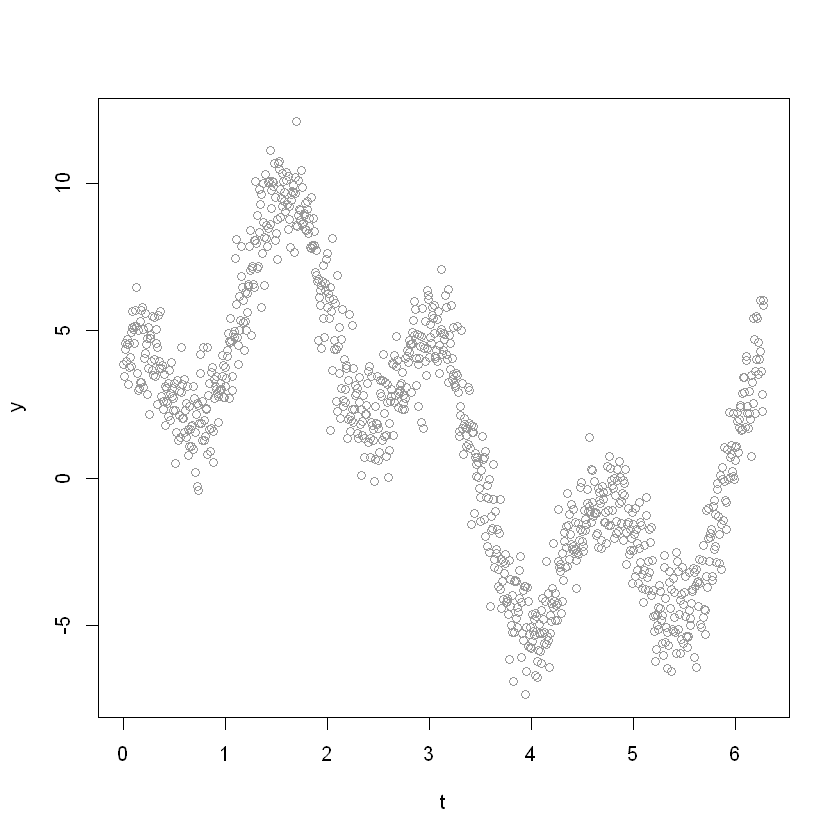

In [33]:
y = 1.5 + 5*x_1 + 3*x_2 + eps
plot(t, y, col = "gray60")

#### `(4)` 두 벡터 ${\bf x}_1$, ${\bf x}_2$와 `cbind()`를 이용하여 아래와 같은 $1000 \times 3$ 매트릭스 ${\bf X}$를 만들어라. 

$${\bf X}=\begin{bmatrix}
1 & \sin(\frac{2\pi}{1000}) & \cos(\frac{8\pi}{1000})\\ 
1 & \sin(\frac{4\pi}{1000}) & \cos(\frac{16\pi}{1000})\\ 
\dots & \dots  & \dots \\ 
1 & \sin(2\pi) & \cos(8\pi)\\ 
\end{bmatrix} $$ 

In [34]:
X = cbind((rep(1,1000)), x_1, x_2)
head(X)

,x_1,x_2
1,0.006283144,0.9996842
1,0.012566040,0.9987370
1,0.018848440,0.9971589
1,0.025130095,0.9949510
1,0.031410759,0.9921147
1,0.037690183,0.9886517


#### `(5)` $3 \times 1$ 매트릭스 $\boldsymbol{\beta}=\begin{bmatrix} 1.5 \\ 5 \\ 3 \end{bmatrix}$를 만들고 매트릭스 곱을 이용하여 ${\bf X} {\boldsymbol \beta}$를 계산하라. 계산결과를 벡터화하고 (3)의 $y$축에 붉은선으로 시각화 하라. 시각화 예시는 아래와 같다. (필요하다면 적절하게 선의 굵기를 조정할 것) 

In [36]:
beta = cbind(c(1.5, 5, 3))
beta

1.5
5.0
3.0


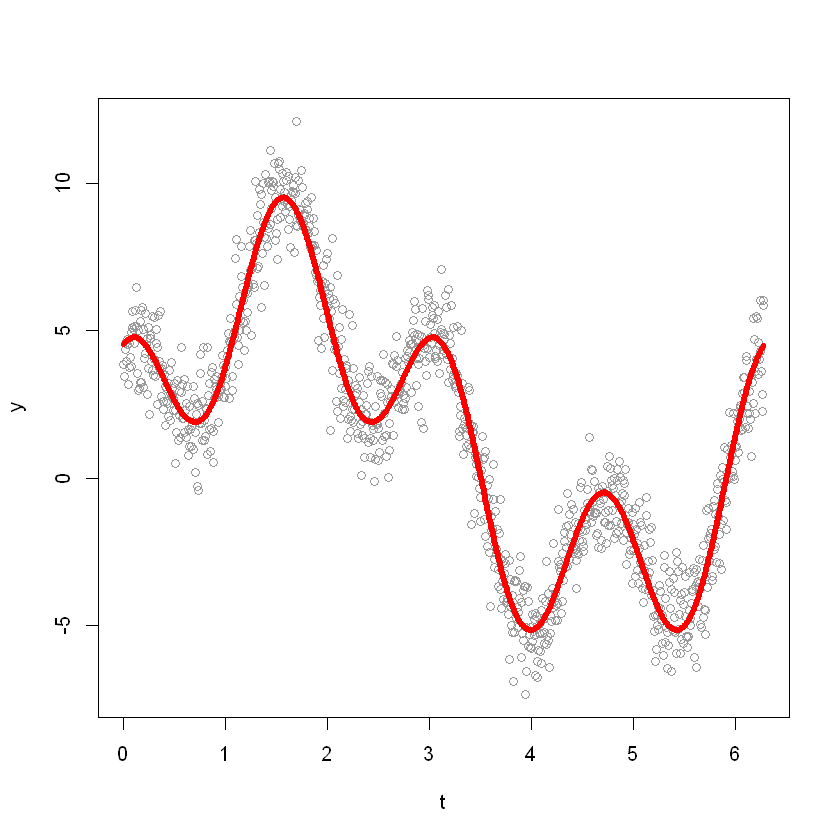

In [37]:
dotp = c(X%*%beta)
plot(t, y, col = "gray60")
lines(t, dotp, col = "red", lwd = 5)

![](https://github.com/guebin/2021IR/blob/master/_notebooks/final_fig2.png?raw=true)

#### `(6)` 아래의 수식을 이용하여 $\boldsymbol{\hat\beta}$를 계산하고 계산결과를 $\boldsymbol{\beta}$와 비교하라. 

$$ \boldsymbol{\hat\beta} = ({\bf X}^\top {\bf X})^{-1}{\bf X}^\top {\bf y}$$ 

여기에서 ${\bf X}$와 ${\bf y}$는 각각 아래와 같다. 

- ${\bf X}=\begin{bmatrix}
1 & \sin(\frac{2\pi}{1000}) & \cos(\frac{8\pi}{1000})\\ 
1 & \sin(\frac{4\pi}{1000}) & \cos(\frac{16\pi}{1000})\\ 
\dots & \dots  & \dots \\ 
1 & \sin(2\pi) & \cos(8\pi)\\ 
\end{bmatrix}$,  $\quad {\bf y}=\begin{bmatrix} y_1\\ y_2\\ \dots \\ y_{1000}\\ \end{bmatrix}$

In [43]:
beta_hat = (solve(t(X)%*%X))%*%t(X)%*%y
compare = cbind(beta, beta_hat, beta - beta_hat)
colnames(compare) = c("BETA", "BETA_HAT", "BETA - BETA_HAT")
compare

,BETA,BETA_HAT,BETA - BETA_HAT
,1.5,1.522394,-0.02239446
x_1,5.0,5.019964,-0.01996399
x_2,3.0,2.965861,0.03413929


- **$\hat{\beta}$와 $\beta$는 거의 비슷한 값임을 알았다.**

또한 ${\bf X}^\top$는 ${\bf X}$의 전치행렬(transpose) 그리고 $({\bf X}^\top {\bf X})^{-1}$은 ${\bf X}^\top {\bf X}$의 역행렬을 의미한다. 

#### `(7)` ${\bf X}\boldsymbol{\hat\beta}$를 계산하라. 계산결과를 벡터화 하고 (5)의 시각화 결과에 푸른점선으로 시각화 하라. 시각화 예시는 아래와 같다. (필요하다면 적절하게 선의 굵기를 조정할 것) 

![](https://github.com/guebin/2021IR/blob/master/_notebooks/final_fig3.png?raw=true)

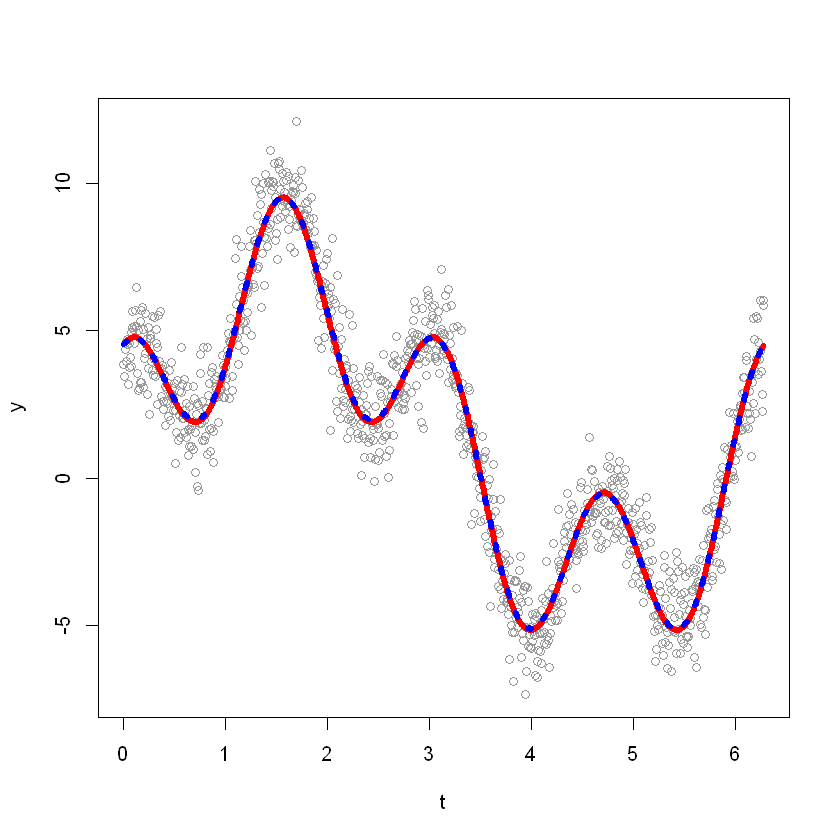

In [44]:
Y7 = X%*%beta_hat
plot(t, y, col = "gray60")
lines(t, dotp, col = "red", lwd = 5)
lines(t, Y7, col = "blue", lty = 3, lwd = 5)

## `2`. 몬테카를로 적분 

#### `(1)` $\int_{-1.96}^{1.96}\frac{1}{\sqrt{2\pi}}e^{-\frac{1}{2}x^2}dx$의 값을 `runif()`를 이용한 몬테카를로 적분으로 계산하라. 

In [132]:
st_normal = function(x) return((1/sqrt(2*pi))*exp(-(1/2)*(x**2)))

In [47]:
xx = runif(n = 10000, min = -1.96, max = 1.96)
yy = st_normal(xx)
rand_yy = runif(n = 10000, min = 0, max = 0.5)

inn = (yy >= rand_yy) %>% sum
outt = (yy < rand_yy) %>% sum
summ = inn + outt

S = 2 * 1.96 * 0.5 * inn/summ
S

[1] 0.946484

- 검산

In [73]:
1-(pnorm(-1.96)*2)

[1] 0.9500042

#### `(2)` `rnorm()`을 이용하여 표준정규분포에서 1000개의 확률변수를 생성하고 생성된 확률변수들 중 구간 $(-1.96 , 1.96)$사이에 있는 확률변수를 count하라. 

In [121]:
A = rnorm(1000, mean = 0, sd = 1)
((-1.96<=A)&(A<=1.96)) %>% sum

[1] 950

- 약 950개이다.

## `3`. 징검다리 

10명의 참가자가 (유리,강화유리)의 쌍으로 이루어진 징검다리를 건너는 게임을 시작한다. (유리,강화유리)의 쌍은 총 20개 있다. 따라서 유리는 총 40장이 있다. 참가자는 강화유리로 된 징검다리를 밟으면 살아남지만 유리로 된 징검다리를 밟으면 죽는다. 10명의 참가자의 특징은 아래와 같다. 

- 1번~8번 참가자, 10번 참가자: 50퍼센트의 확률로 강화유리를 고를 수 있다. 
- 9번 참가자: 95퍼센트의 확률로 강화유리를 고를 수 있다. 

다리를 건너는 순서는 아래와 같이 번호의 오름차순으로 건너는 방법과 번호의 내림차순으로 건너는 2가지 방법이 있다고 하자. 

- Type A: 10번 참가자부터 다리를 건너고 그 뒤로 9번, 8번, ... 1번 순으로 다리를 건넌다. 
- Type B: 1번 참가자부터 다리를 건너고 그 뒤로 2번, 3번, ... 10번 순으로 다리를 건넌다. 

8번 참가자는 Type A 와 Type B 중 어떠한 경우에 살아남을 확률이 높은가? 

### MAIN

In [126]:
users = c("N1", "N2", "N3", "N4", "N5", "N6", "N7", "N8", "N9_PRO", "N10") # 참가자 목록
surv = 10 # 현재 생존자 숫자
player = users[surv]
stage = 0

reset = function(){
    surv <<- 10
    player <<- users[surv]
    stage <<- 0
}

jump_once = function(){
    sof = rbinom(1, size = 1, prob = (0.5 + (player == "N9_PRO")*0.45)) # Success or Failure
    if (sof == FALSE) surv <<- surv - 1 # 사망하면 surv가 1 감소한다.
    stage <<- stage + 1 # 사망 유무와 관계없이 stage는 하나 증가한다.
    player <<- users[surv] # surv = 0이면 player = character(0)
}


simulate = function(){ # 생존자 수를 return한다.
    reset()
    for (i in 1:20){
        jump_once()
        if ( (stage == 20)|(surv == 0) ) break
    }        
    return (surv)
}

#### Type A

In [127]:
rsltA = c()
users = c("N1", "N2", "N3", "N4", "N5", "N6", "N7", "N8", "N9_PRO", "N10")
for (i in 1:10000) rsltA[i] = ifelse(("N8" %in% users[0:simulate()]), TRUE, FALSE)
(rsltA %>% sum) / 10000

[1] 0.4398

#### Type B

In [128]:
rsltB = c()
users = rev(c("N1", "N2", "N3", "N4", "N5", "N6", "N7", "N8", "N9_PRO", "N10"))
for (i in 1:10000) rsltB[i] = ifelse(("N8" %in% users[0:simulate()]), TRUE, FALSE)
(rsltB %>% sum) / 10000

[1] 0.1382

- 결론적으로 `8번 참가자`의 생존률은 `Type A`에서가 더 높다.

## `4`. COVID19

아래는 한국의 코로나확진자 발생수를 tibble로 불러오는 코드와 그 결과이다. 

In [18]:
df=read_csv('https://raw.githubusercontent.com/guebin/2021IR/master/_notebooks/covid19.csv')
head(df)

Rows: 12294 Columns: 5

-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
chr (1): prov
dbl (4): year, month, day, cases


i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.



year,month,day,prov,cases
<dbl>,<dbl>,<dbl>,<chr>,<dbl>
2020,1,20,서울,0
2020,1,20,부산,0
2020,1,20,대구,0
2020,1,20,인천,1
2020,1,20,광주,0
2020,1,20,대전,0


#### `(1)` 2020년의 확진자(cases)총합과 2021년의 확진자(cases)총합을 구하라. 

In [135]:
df_2020 = df %>% filter(year==2020) # 2020년에 발생한 확진자
df_2020$cases %>% sum

[1] 60726

In [131]:
df_2021 = df %>% filter(year==2021) # 2021년에 발생한 확진자
df_2021$cases %>% sum

[1] 396886

#### `(2)` 2020년 2월1일 ~ 2020년 2월15일까지의 기간동안 확진자의 합을 지역별로 나누어 구하라. 가장 많은 확진자가 발견된 지역은 어디인가?

In [144]:
summs = df %>% filter(year==2020, month==2, between(day, 1, 15)) %>% 
  group_by(prov) %>% summarise(sum_cases = sum(cases))

summs
summs[summs$sum_cases == max(summs$sum_cases),]$prov

prov,sum_cases
<chr>,<dbl>
강원,0
검역,0
경기,9
경남,0
경북,0
광주,2
대구,0
대전,0
부산,0


[1] "경기"

- 2020년 2월 1일 ~ 2020년 2월 15일 기간동안 발생한 확진자의 합이 가장 큰 지역은 경기이다.

#### `(3)`  2020년 2월16일 ~ 2020년 2월29일까지의 기간동안 확진자의 총합을 지역별로 나누어 구하라. 가장 많은 확진자가 발견된 지역은 어디인가?

In [143]:
summs = df %>% filter(year==2020, month==2, between(day, 16, 29)) %>% 
  group_by(prov) %>% summarise(sum_cases = sum(cases))

summs
summs[summs$sum_cases == max(summs$sum_cases),]$prov

prov,sum_cases
<chr>,<dbl>
강원,7
검역,0
경기,65
경남,59
경북,472
광주,7
대구,2055
대전,13
부산,75


[1] "대구"

- 2020년 2월 16일 ~ 2020년 2월 29일 기간동안 발생한 확진자의 합이 가장 큰 지역은 대구이다.